In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.pairwise import cosine_similarity, rbf_kernel
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score

# Tasks on Simulation Datasets

In [68]:
# Load in datasets
df_ellip = pd.read_csv(filepath_or_buffer='elliptical.txt', delimiter=" ", header=None)
df_sq = pd.read_csv(filepath_or_buffer='square.txt', delimiter=" ", header=None)
df_cho = pd.read_csv(filepath_or_buffer='cho.txt', delimiter="\t", header=None)
df_iyer = pd.read_csv(filepath_or_buffer='iyer.txt', delimiter="\t", header=None)

## Elliptical Clustering

/Users/ayjmax/Desktop/CSE 347/.venv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


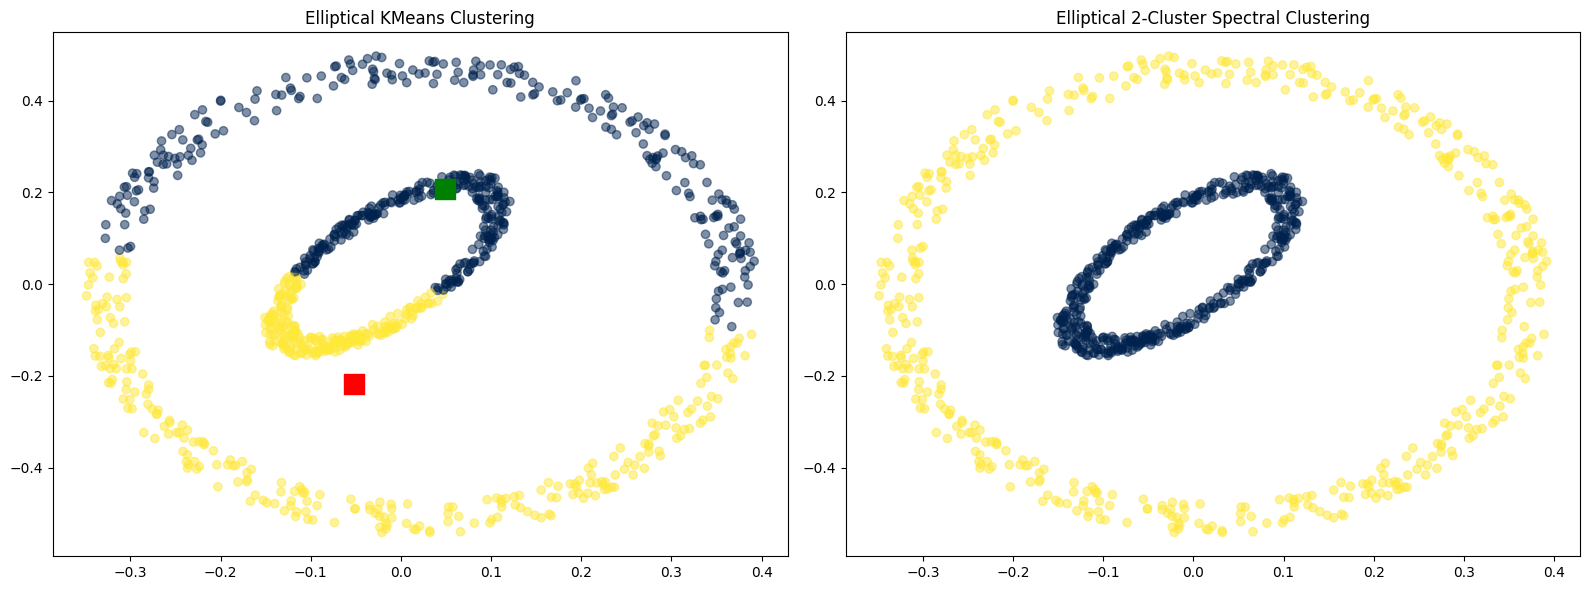

In [61]:
# Perform KMeans Clustering
ellip_km_clustering = KMeans(n_clusters=2, init='k-means++', random_state=0)
ellip_km_clustering.fit(df_ellip)

# Perform Spectral Clustering
ellip_s_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='discretize', random_state=0)
ellip_s_clustering.fit(df_ellip)

# Creating subplots
plt.figure(figsize=(16, 6))

# KMeans
plt.subplot(1, 2, 1)
plt.scatter(df_ellip[0], df_ellip[1], c=ellip_km_clustering.labels_, cmap='cividis', alpha=0.5)
plt.scatter(
    x=ellip_km_clustering.cluster_centers_[0][0],
    y=ellip_km_clustering.cluster_centers_[0][1], s=200, c='g', marker='s')
plt.scatter(
    x=ellip_km_clustering.cluster_centers_[1][0],
    y=ellip_km_clustering.cluster_centers_[1][1], s=200, c='r', marker='s')
plt.title('Elliptical KMeans Clustering')

# Spectral Clustering
plt.subplot(1, 2, 2)
plt.scatter(df_ellip[0], df_ellip[1], c=ellip_s_clustering.labels_, cmap='cividis', alpha=0.5)
plt.title('Elliptical 2-Cluster Spectral Clustering')

plt.tight_layout()
plt.show()

## Square Clustering

/Users/ayjmax/Desktop/CSE 347/.venv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


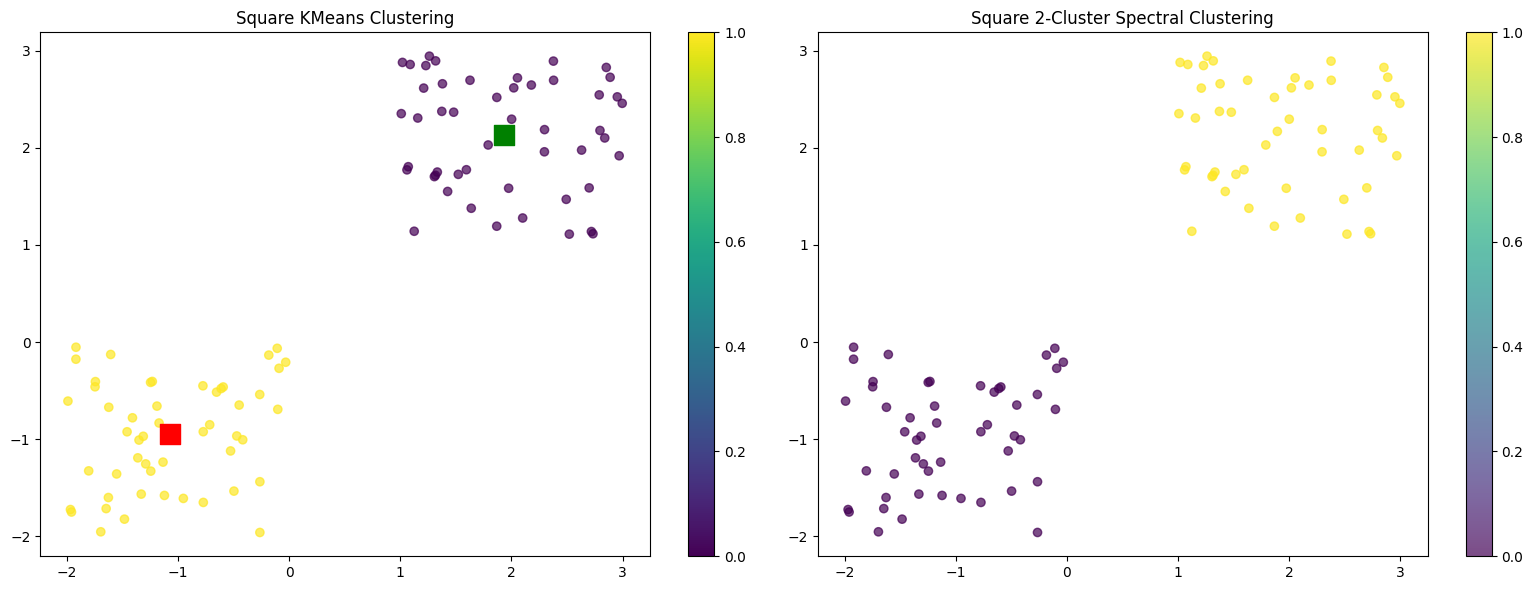

In [65]:
# Perform KMeans Clustering
sq_km_clustering = KMeans(n_clusters=2, init='k-means++', random_state=0)
sq_km_clustering.fit(df_sq)

# Perform Spectral Clustering
sq_s_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='discretize', random_state=0)
sq_s_clustering.fit(df_sq)

# Creating subplots
plt.figure(figsize=(16, 6))

# KMeans
plt.subplot(1, 2, 1)
plt.scatter(df_sq[0], df_sq[1], c=sq_km_clustering.labels_, alpha=0.7)
plt.scatter(
    x=sq_km_clustering.cluster_centers_[0][0],
    y=sq_km_clustering.cluster_centers_[0][1], s=200, c='g', marker='s')
plt.scatter(
    x=sq_km_clustering.cluster_centers_[1][0],
    y=sq_km_clustering.cluster_centers_[1][1], s=200, c='r', marker='s')
plt.title('Square KMeans Clustering')
plt.colorbar()

# Spectral Clustering
plt.subplot(1, 2, 2)
plt.scatter(df_sq[0], df_sq[1], c=sq_s_clustering.labels_, alpha=0.7)
plt.title('Square 2-Cluster Spectral Clustering')
plt.colorbar()

plt.tight_layout()
plt.show()

## Simulation Datasets Explanations

> _Compare the two methods and discuss their pros and cons_

### KMeans Clustering:

#### Pros:

KMeans is typically faster and more scalable to large numbers of samples because it is simpler in computation. The algorithm is easy to understand and implement, and, being one of the oldest clustering algorithms, there's a lot of literature on how to use it effectively.

#### Cons:

KMeans assumes that clusters are convex and isotropic, which means it performs poorly with complex shaped data (like concentric circles). The results can be heavily dependent on where the initial centroids are placed. In addition, you need to specify the number of clusters beforehand, which can be difficult to know without previous knowledge. Outliers can also skew the clustering significantly because KMeans tries to minimize variance. Finally, KMeans can converge to local minima, which may not be the best clustering solution.

### Spectral Clustering:

#### Pros:

Spectral is more flexible as it can cluster data with complex shapes since it uses eigenvectors of a similarity matrix, allowing it to capture the structure of the data better. It is often more effective when the structure of the individual clusters is highly non-convex or more generally when the manifold structure of the clusters is non-Euclidean. It also uses information from the entire dataset to ensure clustering is done based on a global pattern rather than local centroids, as in KMeans.

#### Cons:

Spectral is computationally more intensive, especially for large datasets, since it involves eigenvalue decomposition of the affinity matrix. It is also more difficult to understand and implement correctly compared to KMeans. The choice of affinity matrix and parameters like sigma in the Gaussian kernel can also significantly affect the outcome. Finally, it requires the graph to be fully connected for the algorithm to function properly.

> _Discuss the effects of centroid initialization on k-means clustering results._

In observing k-means clustering w/ both datasets and initialization methods, it is evident that the way centroids are initially positioned has significant impact on the clustering process. Initially, when centroids are poorly initialized, the algorithm tends to converge to local optima that don't represent the best possible clustering solution. This not only affects the overall quality of the clusters (proximity and breadth) but also the speed at which the algorithm converges. Different initializations can lead to a wide variance in the number of iterations needed for the algorithm to stabilize.

## Spectral Clustering w/ Cosine Similarity & Gaussian Kernel

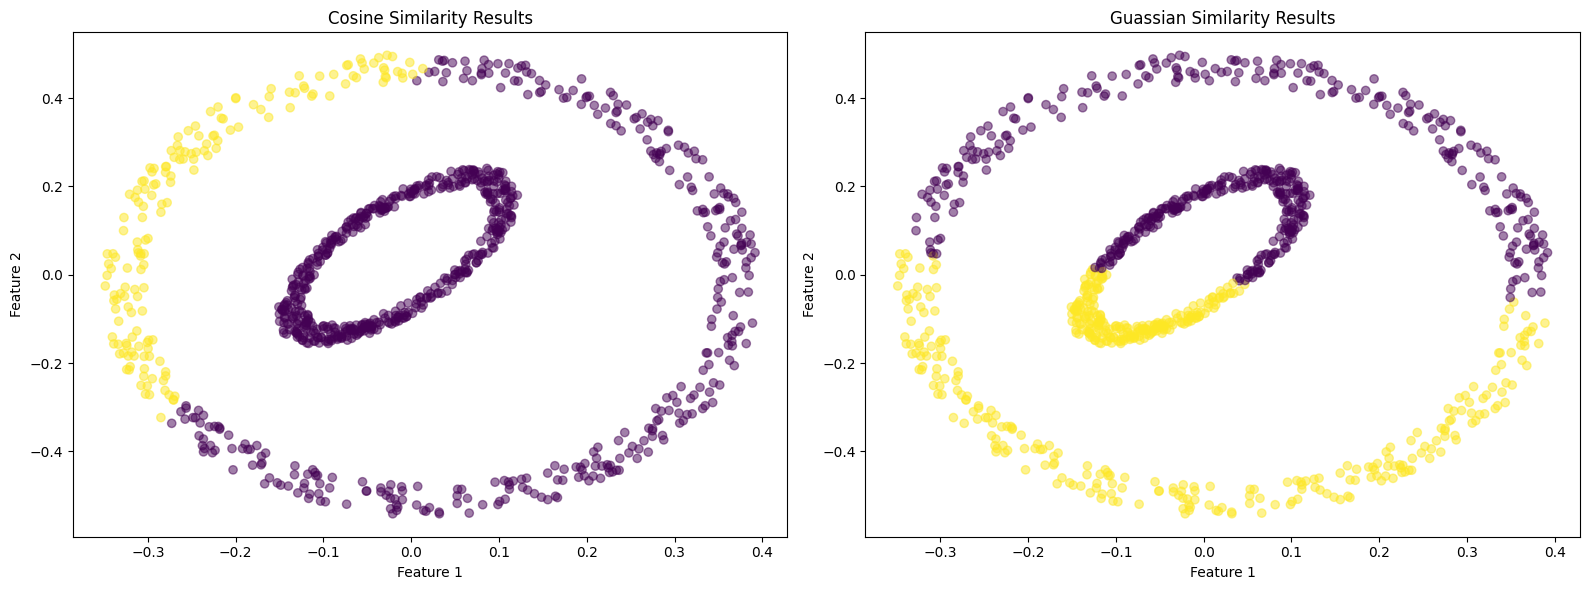

In [67]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit MinMax scaler to data and transform it
df_ellip_minmax_scaled = scaler.fit_transform(df_ellip)

# Compute the Cosine Similarity Affinity Matrix
cosine_affinity_matrix = cosine_similarity(df_ellip_minmax_scaled)

# Compute the Gaussian Kernel Similarity Matrix
# Gaussian Kernel(x,y) = exp((-∣∣x−y∣∣^2​) / (2σ2))
# rbf_kernel(x,y) = exp(gamma * (-∣∣x−y∣∣^2​)), gamma = 2σ2
sigma = 0.5
gamma = 1.0 / (2.0 * (sigma ** 2))
gaussian_affinity_matrix = rbf_kernel(df_ellip, gamma=gamma)

# Apply Spectral Clustering using the affinity matrices
c_spectral = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=0, assign_labels='discretize')
g_spectral = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=0, assign_labels='discretize')
cosine_clustering = c_spectral.fit(cosine_affinity_matrix)
gaussian_clustering = g_spectral.fit(gaussian_affinity_matrix)

# Creating subplots
plt.figure(figsize=(16, 6))

# Cosine Similarity (Pairwise) Affinity Matrix
plt.subplot(1, 2, 1)
plt.scatter(df_ellip[0], df_ellip[1], c=cosine_clustering.labels_, cmap='viridis', alpha=0.5)
plt.title('Cosine Similarity Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Gaussian Similarity (Pairwise) Affinity Matrix
plt.subplot(1, 2, 2)
plt.scatter(df_ellip[0], df_ellip[1], c=gaussian_clustering.labels_, cmap='viridis', alpha=0.5)
plt.title('Guassian Similarity Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

> _Present the performance analysis of the spectral clustering algorithm using different similarity measures like
> cosine similarity and Gaussian kernel similarity (set an appropriate bandwidth parameter for Gaussian kernel)._

Based on the visualizations of both Spectral clustering using Cosine Similarity and Gaussian Kernel Similarity for the (pairwise) affinity matrix, both present widly different results from the ground truth. From multiple iterations w/ various random states, Cosine similarity seems to favor one larger cluster and one smaller cluster, regardless of the geometric shapes of the concentric circles. The Gaussian Kernel seems to favor an even split across both circles, ignoring the distinct shapes of the circles. This is also altered by various changes to the 'gamma' parameter and random states given to the algorithm.


## Spectral Clustering w/ Laplacian Matrices

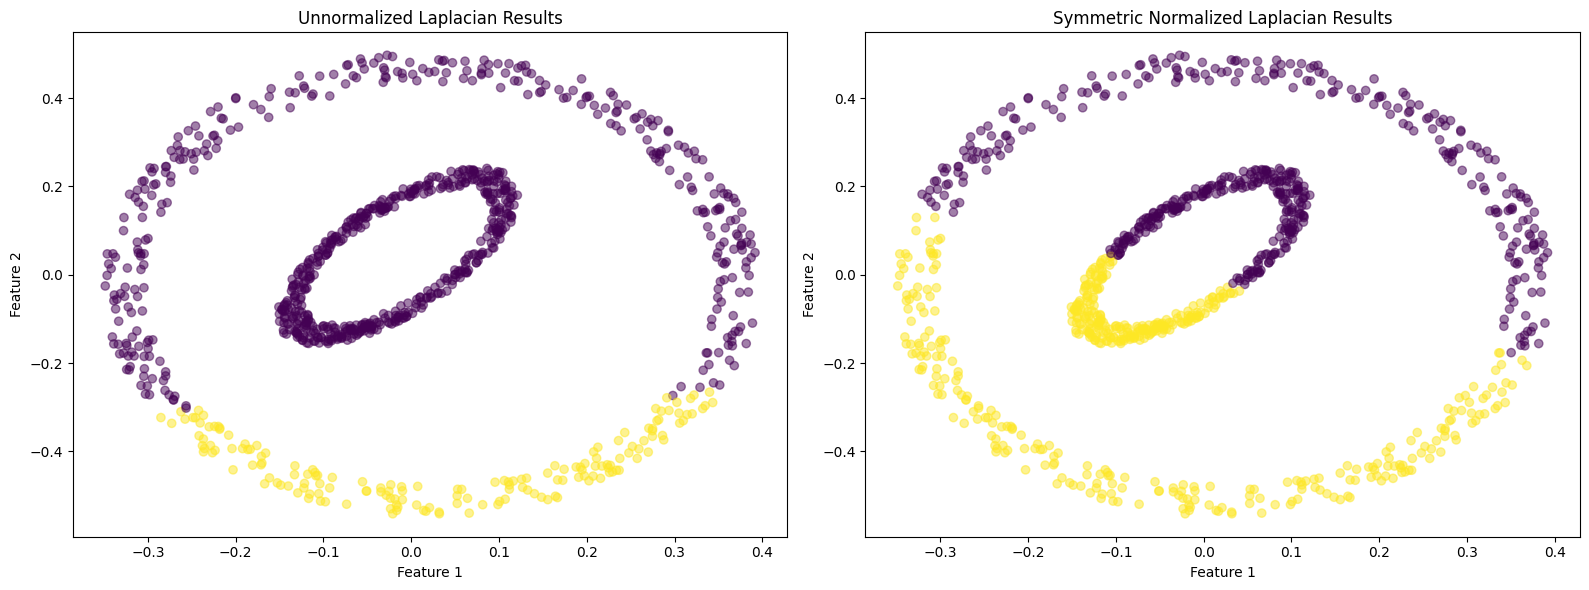

In [76]:
# Compute the Gaussian Kernel Similarity Matrix
# Gaussian Kernel(x,y) = exp((-∣∣x−y∣∣^2​) / (2σ2))
# rbf_kernel(x,y) = exp(gamma * (-∣∣x−y∣∣^2​)), gamma = 2σ2
sigma = 0.5
gamma = 1.0 / (2.0 * (sigma ** 2))
W = rbf_kernel(df_ellip, gamma=gamma)

temp = W.sum(axis=1)

# Compute the Degree Matrix D
D = np.diag(W.sum(axis=1))

# Compute the Unnormalized Laplacian L
L = D - W

# Compute the Symmetric Normalized Laplacian L_sym
D_inv_sqrt = np.diag(1.0 / np.sqrt(np.diag(D)))
L_sym = np.dot(np.dot(D_inv_sqrt, L), D_inv_sqrt)

# Eigenvalue Decomposition
un_eigenvalues, un_eigenvectors = np.linalg.eigh(L)
sym_eigenvalues, sym_eigenvectors = np.linalg.eigh(L_sym)

# Select "k" (n_clusters) Eigenvectors
n_clusters = 2

# Indices of the smallest eigenvalues (sorted)
idx = np.argsort(un_eigenvalues)[1:n_clusters+1]  # SKIP the first zero eigenvalue
U_unnormal = un_eigenvectors[:, idx]
idx = np.argsort(sym_eigenvalues)[1:n_clusters+1]
U_sym = sym_eigenvectors[:, idx]

# Cluster the Rows of U
un_kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=20).fit(U_unnormal)
sym_kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=20).fit(U_sym)

# Creating subplots
plt.figure(figsize=(16, 6))

# Unnormalized Laplacian Matrix
plt.subplot(1, 2, 1)
plt.scatter(df_ellip[0], df_ellip[1], c=un_kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('Unnormalized Laplacian Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Symmetric Normalized Laplacian Matrix
plt.subplot(1, 2, 2)
plt.scatter(df_ellip[0], df_ellip[1], c=sym_kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('Symmetric Normalized Laplacian Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

>  _Present the performance analysis of the spectral clustering algorithm using different Laplacian matrices like unnormalized Laplacian and normalized symmetric Laplacian_

The usage of unnormalized Laplacian matrix seems to reflect a similar clustering to the use of Cosine similarity, where both favor a larger cluster and a smaller cluster, ignoring the distinct concentric circles shape. Oftentimes, the unnormalized Laplacian matrix result will show a single datapoint with one label and all other data points with the other label. The usage of symmetric normalized Laplacian matrix reflects a similar clustering to the use of Gaussian kernel, where both favor an even split through both circles, ignoring the distinct shapes of the circles.

While both exist slightly different results, both the usage of unnormalized Laplacian matrices and symmetric, normalized Laplacian matrices seem to ignore the distinct concentric circles.

# Real Datasets

## Utility Functions

In [124]:
def remove_outlier(df):
    # Get absolute Z-scores to identify outliers
    abs_z_scores = np.abs(stats.zscore(df))

    # Identify rows where all values have Z-scores less than 3
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    
    print(filtered_entries)

    # Select rows without outliers
    df_clean = df[filtered_entries]

    return df_clean

def z_score_scale(df):
    z_scaler = StandardScaler()
    df_scaled = z_scaler.fit_transform(df)

    return df_scaled

def get_accuracy(truth, labels):
    labels_matched = np.empty_like(labels)
    # For each cluster label...
    for k in np.unique(labels):
        # ...find and assign the best-matching truth label
        match_nums = [np.sum((labels==k)*(truth==t)) for t in np.unique(truth)]
        labels_matched[labels==k] = np.unique(truth)[np.argmax(match_nums)]

    return accuracy_score(y_true=truth, y_pred=labels_matched)

def get_sse(data, centroids, labels):
    # Calculate sum of squared errors (SSE)
    sse = 0
    for i in range(len(data)):
        # Squared distance between a data point and its assigned centroid
        squared_distance = np.sum((data[i] - centroids[labels[i]])**2)
        sse += squared_distance

    return sse

## Cho Dataset Clustering

In [109]:
df_cho = pd.read_csv(filepath_or_buffer='cho.txt', delimiter="\t", header=None)

# Get ID and Ground Truth Columns
df_cho_id = df_cho[0].copy()
df_cho_truth = df_cho[1].copy()

df_cho.drop([0, 1], axis=1, inplace=True)
df_cho.columns = range(df_cho.shape[1])

## Control
print("----- Control -------")
# Perform KMeans Clustering
cho_km_clustering = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(df_cho)
print("KMeans Accuracy: ", get_accuracy(df_cho_truth.values, cho_km_clustering.labels_))
print("KMeans SSE: ", get_sse(df_cho.values, cho_km_clustering.cluster_centers_, cho_km_clustering.labels_))

# Perform Spectral Clustering
cho_s_clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', assign_labels='discretize', random_state=0).fit(df_cho)
print("Spectral Accuracy: ", get_accuracy(df_cho_truth.values, cho_s_clustering.labels_))

## w/ Normalization
print("------- w/ Normalization (Z-score scaling) ------")
np_cho_normal = z_score_scale(df_cho)
cho_km_clustering = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(np_cho_normal)
print("KMeans Accuracy: ", get_accuracy(df_cho_truth.values, cho_km_clustering.labels_))
print("KMeans SSE: ", get_sse(df_cho.values, cho_km_clustering.cluster_centers_, cho_km_clustering.labels_))

cho_s_clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', assign_labels='discretize', random_state=0).fit(np_cho_normal)
print("Spectral Accuracy: ", get_accuracy(df_cho_truth.values, cho_s_clustering.labels_))

----- Control -------
KMeans Accuracy:  0.6450777202072538
KMeans SSE:  982.4573709637095
Spectral Accuracy:  0.6761658031088082
------- w/ Normalization (Z-score scaling) ------
KMeans Accuracy:  0.6373056994818653
KMeans SSE:  1749.452084481489
Spectral Accuracy:  0.6450777202072538


## Iyer Dataset Clustering

In [133]:
df_iyer_og = pd.read_csv(filepath_or_buffer='iyer.txt', delimiter="\t", header=None)
# Get ID and Ground Truth Columns
df_iyer_id = df_iyer_og[0].copy()
df_iyer_truth = df_iyer_og[1].copy()

df_iyer = df_iyer_og.drop([0, 1], axis=1)
df_iyer.columns = range(df_iyer.shape[1])

## Control
print("----- Control -------")
# Perform KMeans Clustering
iyer_km_clustering = KMeans(n_clusters=11, init='k-means++', random_state=0).fit(df_iyer)
print("KMeans Accuracy: ", get_accuracy(df_iyer_truth.values, iyer_km_clustering.labels_))
print("KMeans SSE: ", get_sse(df_iyer.values, iyer_km_clustering.cluster_centers_, iyer_km_clustering.labels_))

# Perform Spectral Clustering
iyer_s_clustering = SpectralClustering(n_clusters=11, affinity='nearest_neighbors', assign_labels='discretize', random_state=0).fit(df_iyer)
print("Spectral Accuracy: ", get_accuracy(df_iyer_truth.values, iyer_s_clustering.labels_))

## w/ Normalization
print("------- w/ Normalization (Z-score scaling) ------")
np_iyer_normal = z_score_scale(df_iyer)
iyer_km_clustering = KMeans(n_clusters=11, init='k-means++', random_state=0).fit(np_iyer_normal)
print("KMeans Accuracy: ", get_accuracy(df_iyer_truth.values, iyer_km_clustering.labels_))
print("KMeans SSE: ", get_sse(df_iyer.values, iyer_km_clustering.cluster_centers_, iyer_km_clustering.labels_))

iyer_s_clustering = SpectralClustering(n_clusters=11, affinity='nearest_neighbors', assign_labels='discretize', random_state=0).fit(np_iyer_normal)
print("Spectral Accuracy: ", get_accuracy(df_iyer_truth.values, iyer_s_clustering.labels_))

## w/ Noise/Outlier Removal
print("------- w/ Noise Removal ------")
# Remove outliers
temp = df_iyer_og[1] != -1
df_iyer_no_outlier = df_iyer_og[temp]
df_iyer_no_outlier_truth = df_iyer_no_outlier[1].copy()
df_iyer_no_outlier.drop([0, 1], axis=1, inplace=True)

iyer_km_clustering = KMeans(n_clusters=10, init='k-means++', random_state=0).fit(df_iyer_no_outlier)
print("KMeans Accuracy: ", get_accuracy(df_iyer_no_outlier_truth.values, iyer_km_clustering.labels_))
print("KMeans SSE: ", get_sse(df_iyer_no_outlier.values, iyer_km_clustering.cluster_centers_, iyer_km_clustering.labels_))

iyer_s_clustering = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', assign_labels='discretize', random_state=0).fit(df_iyer_no_outlier)
print("Spectral Accuracy: ", get_accuracy(df_iyer_no_outlier_truth.values, iyer_s_clustering.labels_))

----- Control -------
KMeans Accuracy:  0.4700193423597679
KMeans SSE:  2081.193254914183
Spectral Accuracy:  0.6499032882011605
------- w/ Normalization (Z-score scaling) ------
KMeans Accuracy:  0.4990328820116054
KMeans SSE:  20168.438373005298
Spectral Accuracy:  0.5319148936170213
------- w/ Noise Removal ------
KMeans Accuracy:  0.5041322314049587
KMeans SSE:  2008.6247962836524
Spectral Accuracy:  0.7024793388429752


/var/folders/lp/9t0bm8f10fzfwl0y6_715rdc0000gn/T/ipykernel_91808/2029659671.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iyer_no_outlier.drop([0, 1], axis=1, inplace=True)


### Discussion

#### Cho Dataset

For the Cho dataset, the control KMeans (w/ no normalization) clustering showed an accuracy of 64.5% and average SSE of 982.457. When the normalization, otherwise known as Z-score scaling, was implemented, the accuracy went down slightly to 63.7% and average SSE of 1749.452. For Spectral clustering, the control showed an accruacy of 67.62%. Using normalization, the accuracy went slightly down to 64.51%.

Since the preprocessing negatively impacted the accuracy results, this indicates that other data preprocessing technqiues should be utilized for the Cho dataset.

#### Iyer dataset

For the Iyer datase, the control KMeans (no normalization or outlier removal) clustering showed an accuracy of 47.00% and a SSE of 2081.19. The control Spectral clustering showed an accuracy of 64.99%. When normalization was applied, KMeans accuracy slightly increased to 49.90%, but Spectral clustering accuracy decreased to 53.19%. When noisy data was removed, the accuracy for KMeans, compared to the control, increased to 50.41% and the accuracy of Spectral clustering increased significantly to 70.25%.

#### Overall

While the Cho dataset saw slight decreases in accuracy when normalization (Z-score scaling) was applied, the Iyer dataset saw increases in accuracy, but only for KMeans - the accuracy of Spectral clustering decreased in both. This may imply that rather than normalization, other preprocessing techniques can be used to scale and transform the datasets.

When removing the outlier data from Iyer, it saw increases in accuracy for both Spectral clustering and KMeans, by a larger margin than with just normalization. By removing noisy data, both clustering methods saw larger improvements in the accuracy.